In [211]:
import numpy as np
from os.path import join as pjoin
import hypertools as hyp
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import runpy
%matplotlib inline

In [213]:
# import functions from other scripts
file_globals = runpy.run_path('digit_classification.py')
get_digit_indices = file_globals['get_digit_indices']

In [193]:
# load data
results_dir = '/data/BnB_USER/oliver/somato/scratch/crossval_projection'

# for first run is training, second is test
proj_data_run1train_npy = pjoin(results_dir, 'proj_run1_is_train.npy')
trained_srms_run1train_npy = pjoin(results_dir, 'trainedsrms_run1_is_train.npy')
with open(proj_data_run1train_npy, 'rb') as inf:
    proj_data_run1train = np.load(inf)
with open(trained_srms_run1train_npy, 'rb') as inf:
    trained_srms_run1train = np.load(inf)
    
# second run is training, first is test
proj_data_run2train_npy = pjoin(results_dir, 'proj_run2_is_train.npy')
trained_srms_run2train_npy = pjoin(results_dir, 'trainedsrms_run2_is_train.npy')

with open(proj_data_run2train_npy, 'rb') as inf:
    proj_data_run2train = np.load(inf)
with open(trained_srms_run1train_npy, 'rb') as inf:
    trained_srms_run2train = np.load(inf)

In [194]:
# make lists of data frames for hypertools plotting

# first run is training, second is test
projected_dfs_run2 = []
trained_srms_dfs_run1 = []

for sub_idx in range(proj_data_run1train.shape[0]):
    df = pd.DataFrame(proj_data_run1train[sub_idx].T)
    projected_dfs_run2.append(df)
    srm_df = pd.DataFrame(trained_srms_run1train[sub_idx].T)
    trained_srms_dfs_run1.append(srm_df)

# second run is training, first is test
projected_dfs_run1 = []
trained_srms_dfs_run2 = []

for sub_idx in range(proj_data_run2train.shape[0]):
    df = pd.DataFrame(proj_data_run2train[sub_idx].T)
    projected_dfs_run1.append(df)
    srm_df = pd.DataFrame(trained_srms_run2train[sub_idx].T)
    trained_srms_dfs_run2.append(srm_df)

# set up finger colors

Text(0.5, 1.0, 'finger color arrays')

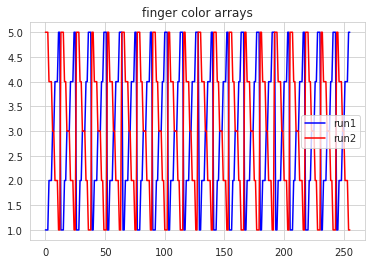

In [290]:
# create finger-color arrays

# get ndarrays (nfingers, nvols)
digits_run1, digits_run2 = get_digit_indices()

# turn into flat arrays with values 1-5
digit_colors_run1, digit_colors_run2 = np.zeros(shape=(256)), np.zeros(shape=(256))
for finger_i in range(1,6):
    digit_colors_run1[digits_run1[finger_i-1]] = finger_i
    digit_colors_run2[digits_run2[finger_i-1]] = finger_i

# for some reason, the first entry in the first run's digit array is a 5, but should be a 1...
digit_colors_run1[0]=1.

# look at result to make sure it makes sens
plt.plot(digit_colors_run1, color='b')
plt.plot(digit_colors_run2, color='r')
plt.legend(['run1', 'run2'])
plt.title('finger color arrays')

# Plot run-wise projected data and SRM templates for given subject

In [303]:
def plot_all_for_subject(sub_idx):
    figkwargs = {'reduce':'PCA', 'size':[8,5], 'fmt':'-'}
    geo = hyp.plot(projected_dfs_run2[sub_idx], title='projected data: subject %i, run 2.' % (sub_idx+1), 
                   hue=digit_colors_run2, **figkwargs, save_path='animations/proj_sub%i_run2'% (sub_idx+1))
    geo = hyp.plot(trained_srms_dfs_run1[sub_idx], title='SRM: subject %i held out, run 1.'% (sub_idx+1), 
                   hue=digit_colors_run1, **figkwargs, save_path='animations/srm_sub%i_run1'% (sub_idx+1))
    geo = hyp.plot(projected_dfs_run1[sub_idx], title='projected data: subject %i, run 1.'% (sub_idx+1), 
                   hue=digit_colors_run1, **figkwargs, save_path='animations/proj_sub%i_run1'% (sub_idx+1))
    geo = hyp.plot(trained_srms_dfs_run2[sub_idx], title='SRM: subject %i held out, run 2.'% (sub_idx+1), 
                   hue=digit_colors_run2, **figkwargs, save_path='animations/srm_sub%i_run2'% (sub_idx+1))

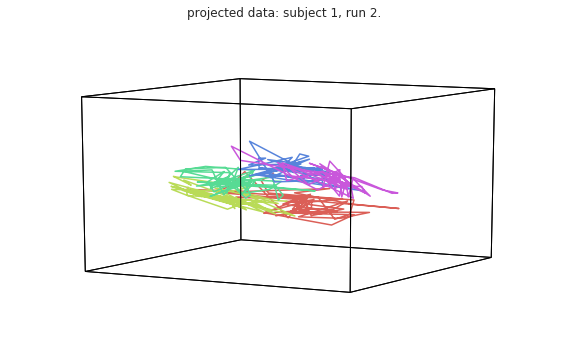

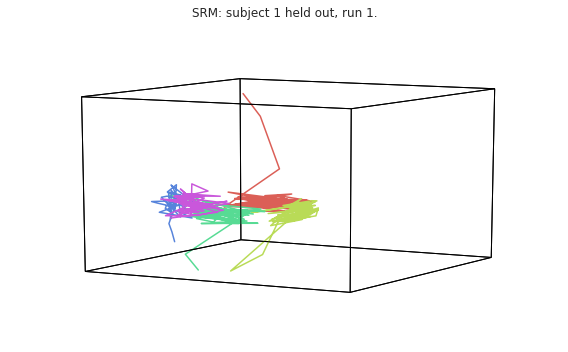

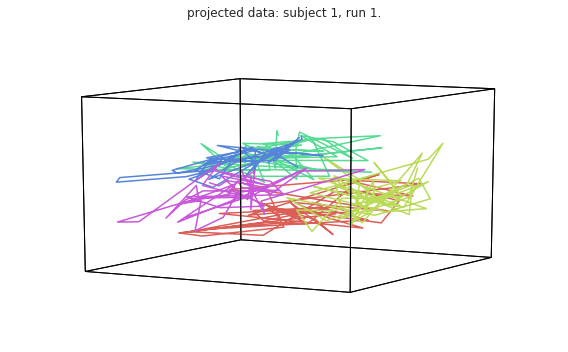

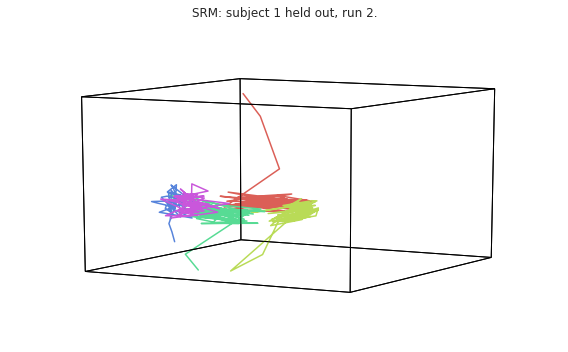

In [304]:
plot_all_for_subject(0)

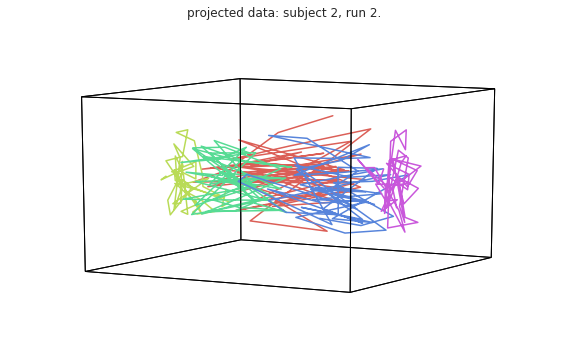

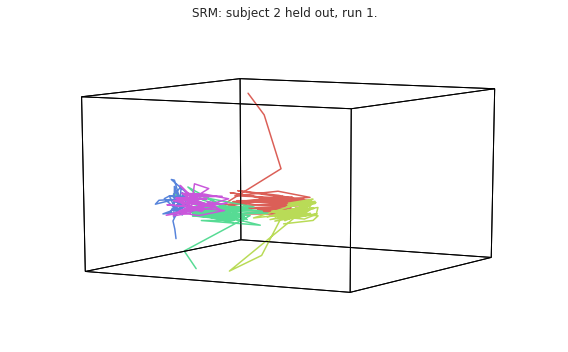

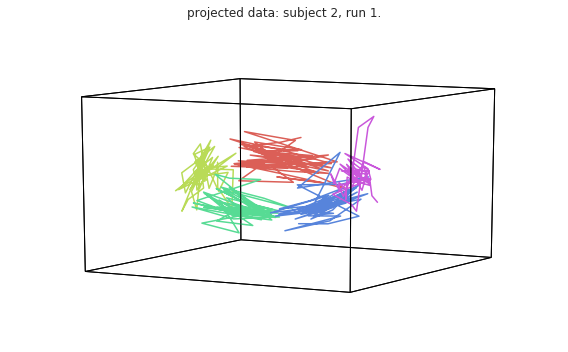

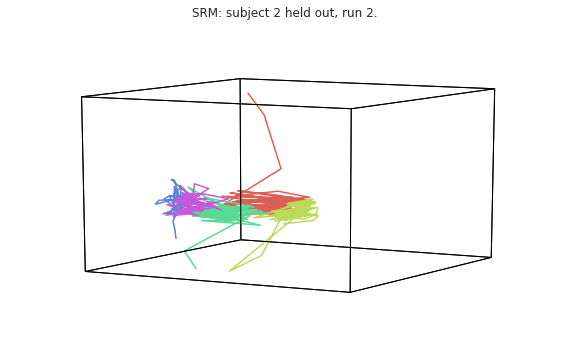

In [305]:
plot_all_for_subject(1)

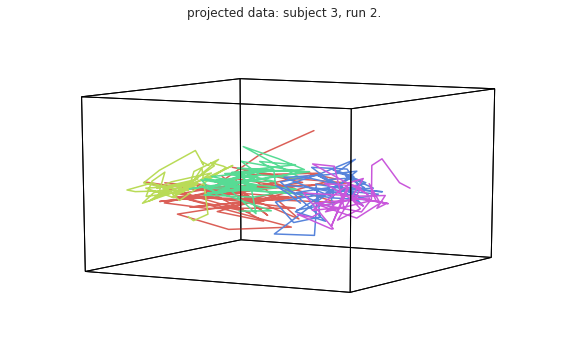

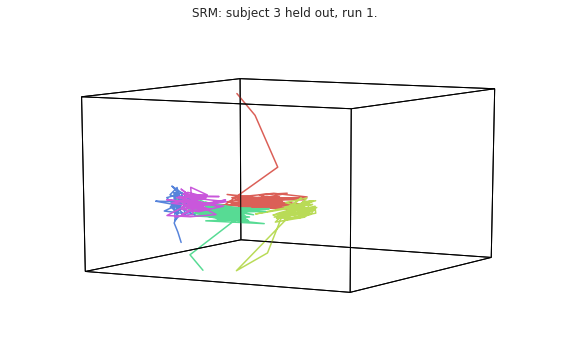

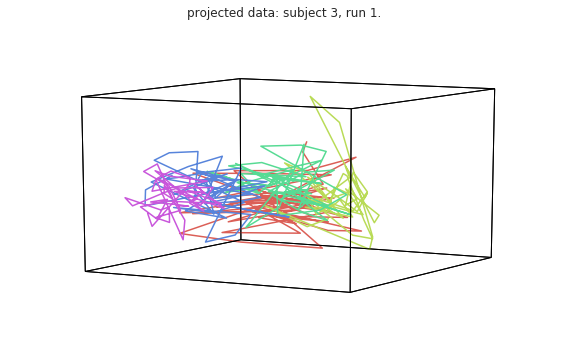

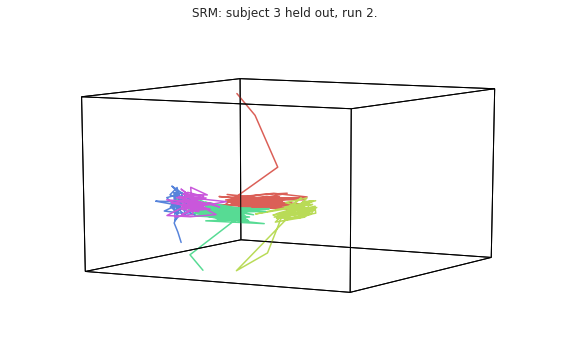

In [306]:
plot_all_for_subject(2)

# Playground

## Compare different dimensionality reduction algorithms

reduce : str or dict
    Decomposition/manifold learning model to use.  Models supported: PCA,
    IncrementalPCA, SparsePCA, MiniBatchSparsePCA, KernelPCA, FastICA,
    FactorAnalysis, TruncatedSVD, DictionaryLearning, MiniBatchDictionaryLearning,
    TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding, and MDS. Can be
    passed as a string, but for finer control of the model parameters, pass
    as a dictionary, e.g. reduce={'model' : 'PCA', 'params' : {'whiten' : True}}.
    See scikit-learn specific model docs for details on parameters supported
    for each model.

Default is IncrementalPCA

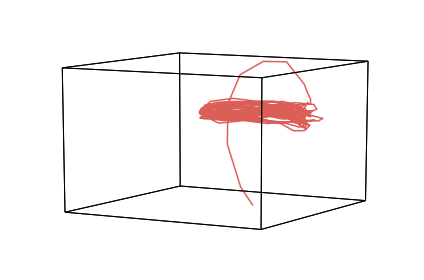

In [124]:
geo = hyp.plot(trained_srms_dfs[0], reduce='IncrementalPCA')

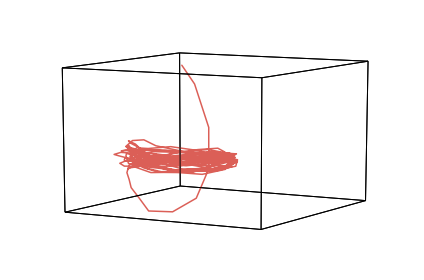

In [125]:
geo = hyp.plot(trained_srms_dfs[0], reduce='PCA')

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


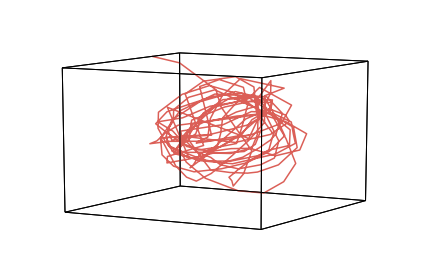

In [130]:
geo = hyp.plot(trained_srms_dfs[0], reduce='MDS')

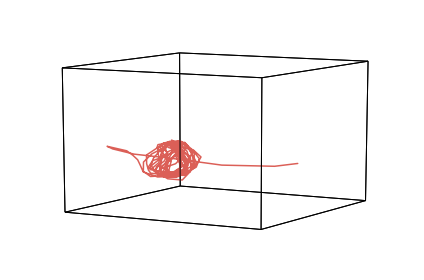

In [131]:
geo = hyp.plot(trained_srms_dfs[0], reduce='FastICA')

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


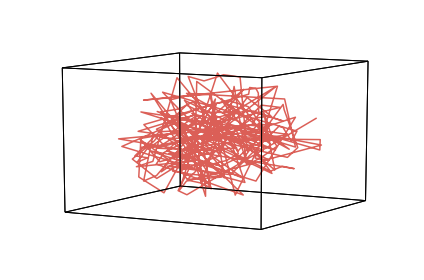

In [132]:
geo = hyp.plot(trained_srms_dfs[0], reduce='TSNE')

- Use MDS instead of PCA

In [91]:
# plot projected data trajectories

geo = hyp.plot(trained_srms_dfs[:4],
               size=[8,4], animate='parallel', frame_rate=10,
               tail_duration=1.,
               chemtrails=False,
               zoom=1.5,
               show=False)

anim = geo.line_ani
HTML(anim.to_html5_video())

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()
